
# Домашнее задание к лекции "Визуализация данных"
Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах;
данные по фильмам и сериалам Netflix.
Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;
не менее двух визуализаций должны быть интерактивными.

Для анализа был взяты данные с сайта kaggle.com  New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv

In [2]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [156]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Посмотрим на соотношения Цены, Минимального количества дней и Количества отзывов. 

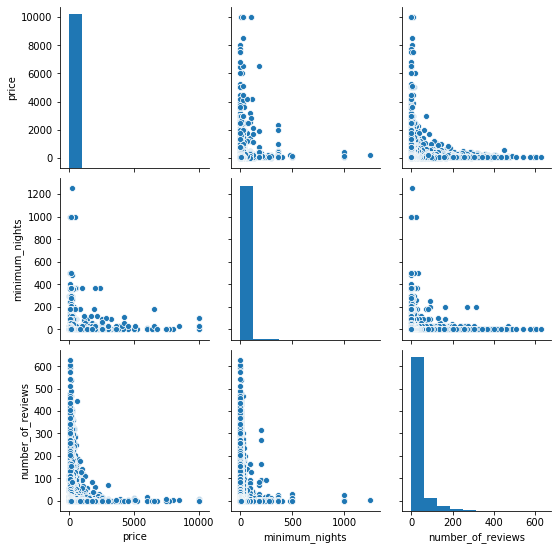

In [9]:
sns_plot = sns.pairplot(
    df[['price', 'minimum_nights', 'number_of_reviews']])
sns_plot

Вывод по графику: не прослеживаются закономерности между ценой, количеством ночей и количеством отзывов. Можно увидеть большое количество значений отзывов при низкой цене, а минимальное количество ночей скорей невелико при любой цене.


#### Посмотрим распределение  Минимального количества ночей

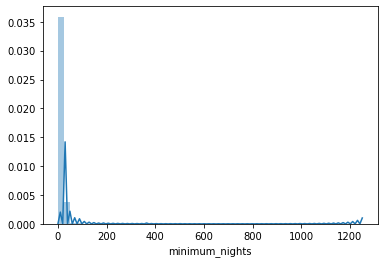

In [45]:
sns.distplot(df.minimum_nights)

Вывод: самое распространенное значение минимальных дней - 1-3, остальные значения сравнительно незначительны

#### Проверим зависимость цены от количества дней

In [165]:
price_min_nights = df.groupby('minimum_nights').price.mean().reset_index()
price_min_nights 

,minimum_nights,price
0,1,142.022877
1,2,146.270178
2,3,160.251281
3,4,161.191644
4,5,157.310811
...,...,...
104,480,199.000000
105,500,88.800000
106,999,96.000000
107,1000,400.000000


In [166]:
trace0 = go.Scatter(
    x=price_min_nights.minimum_nights,
    y=price_min_nights.price,
    name='Price/minimum nights'
)
 
data = [trace0]
layout = {'title': 'Price/minimum nights'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Целью построения графика было проверить гипотезу, что с увеличением числа минимальных дней цена будет падать. Но график оказался неинформативным из-за 2 сильных выбросов по цене. Для данной задачи удалим их и перестроим график.

In [167]:
price_min_nights_corr = price_min_nights[~((price_min_nights.minimum_nights == 99)|(price_min_nights.minimum_nights == 114))]

In [168]:
trace0 = go.Scatter(
    x=price_min_nights_corr.minimum_nights,
    y=price_min_nights_corr.price,
    name='Price/minimum nights'
)


  
data = [trace0]
layout = {'title': 'Price/minimum nights'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

Несмотря на корректировку, график остался неоднородным и не позволяет сделать выводы о снижении цены при увеличении минимальных дней.

#### Посмотрим на распределение цен в зависимости от округов (neighbourhood_group)

In [70]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [76]:
data = []

for place in df.neighbourhood_group.unique():
    data.append(
        go.Box(y=df[df.neighbourhood_group==place].price, 
               name=place)
    )
iplot(data, show_link = False)

При зрительно одинаковых медианных значениях разных округов, можно увидеть 'хвосты' вверх (наибольший - у Манхэттана, наименьший  - у Бронкса) и выбросы в виде отдельных предложений квартир по экстремально высоким ценам.

#### Рассчитаем средную стоимость аренды по округам


In [92]:
place_price = df.groupby('neighbourhood_group').mean().sort_values('price', ascending=False)[['price']]
# place_price.sort_values('price', ascending=False)
place_price 

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


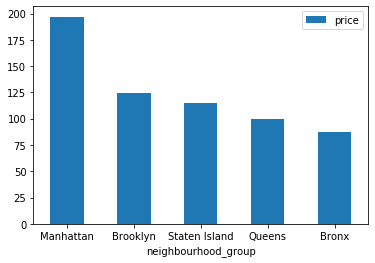

In [93]:
place_price.plot(kind='bar', rot=0)

На графике представлены средние цены по округам, самый дорогой - Манхэттан, самый дешевый - Бронкс, что находится в соответствии с предыдущим графиком.

#### Проведем анализ цен в отдельных районах в зависимости от типа апартаментов


In [157]:
top_neighborhoods = df['neighbourhood'].value_counts().head(15)
list(top_neighborhoods.index[:])


['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown',
 'East Harlem',
 'Greenpoint',
 'Chelsea',
 'Lower East Side',
 'Astoria']

In [158]:
neighbourhood_price = df.loc[df.neighbourhood.isin(list(top_neighborhoods.index[:]))]
neighbourhood_price

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [159]:
neighb_price_pivot = neighbourhood_price.pivot_table(
                        index='neighbourhood', 
                        columns='room_type', 
                        values='price', 
                        aggfunc='mean').fillna(0).applymap(float)

In [161]:
neighb_price_pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Astoria,142.199475,96.178138,151.160000
Bedford-Stuyvesant,154.780641,73.296860,50.376471
Bushwick,145.784661,62.623037,37.382353
Chelsea,283.262195,156.741007,140.666667
Crown Heights,159.631094,68.573077,50.880000
East Harlem,189.545267,91.701365,65.044444
East Village,226.305983,118.333333,84.086957
Greenpoint,190.115756,88.462185,65.705882
Harlem,177.595560,81.950413,68.081633


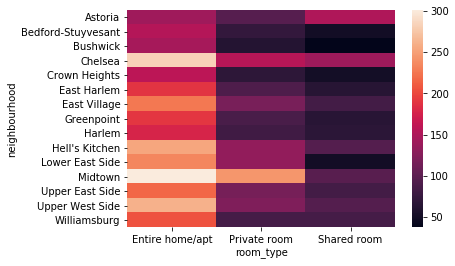

In [163]:
ax = sns.heatmap(neighb_price_pivot)

Для таблицы я выбрала 15 самых часто встречающихся районов. Данная таблица весьма наглядна. Она не только иллюстрирует очевидное - что квартиры дороже комнат, но и показывает самые дорогие ( Chelsea, Midtown) и самые дешевые (Astoria, Bushwick, Crown Heights)  районы среди часто встречающихся.